# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [3]:
!git clone https://github.com/ejstew21/visualization.git

fatal: destination path 'visualization' already exists and is not an empty directory.


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
df = pd.read_csv('/content/visualization/assignment/data/college_completion.csv', low_memory="False")

In [15]:
df.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [19]:
df.shape

(3798, 63)

In [21]:
df.columns

print('The data is 3798 rows x 63 columns. There are 3798 observations and 63 variables, listed below.')

The data is 3798 rows x 63 columns. There are 3798 observations and 63 variables, listed below.


In [36]:
print(pd.crosstab(df['control'], df['level']), "\n")

print("Most institutions are 4-year universities that are prive and not-for-profit. \nMost 2 year institutions are for profit, while most 4 year institutions are not.")

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632 

Most institutions are 4-year universities that are prive and not-for-profit. 
Most 2 year institutions are for profit, while most 4 year institutions are not.


<Axes: xlabel='grad_100_value', ylabel='Count'>

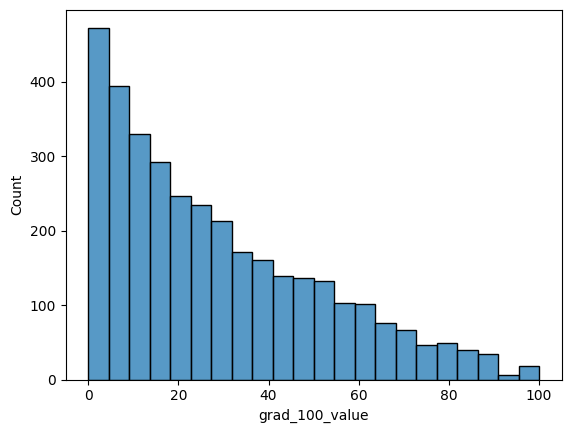

In [41]:
sns.histplot(df['grad_100_value'])

<Axes: xlabel='grad_100_value', ylabel='Density'>

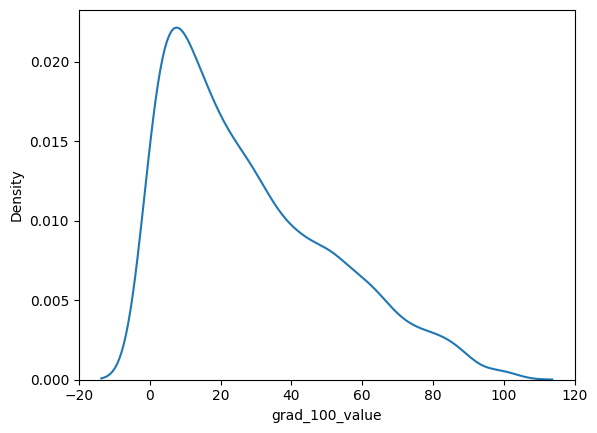

In [43]:
sns.kdeplot(df['grad_100_value'])

<Axes: ylabel='grad_100_value'>

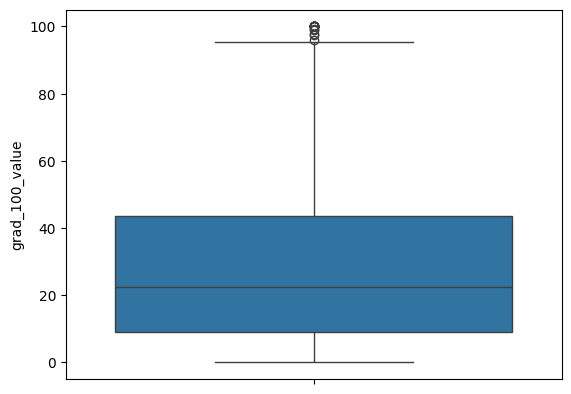

In [45]:
sns.boxplot(df['grad_100_value'])

In [48]:
df['grad_100_value'].describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

<Axes: xlabel='grad_100_value', ylabel='Density'>

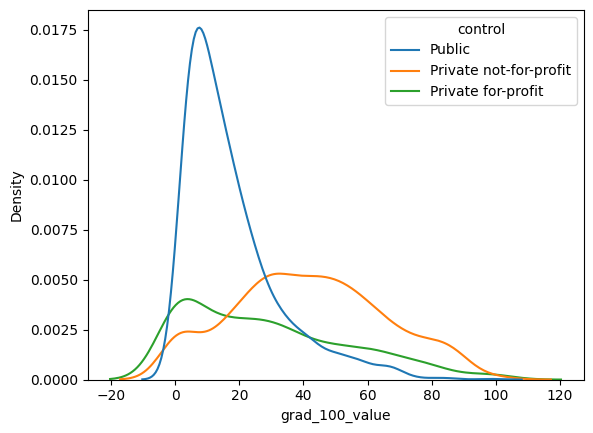

In [50]:
sns.kdeplot(data=df,x='grad_100_value',hue='control')

In [55]:
df.loc[:, ['control', 'grad_100_value']].groupby('control').describe()
# I got lost on this and pulled it from the solutions, but I understand how it works after looking at it
# Private not-for-profit institutions appear to have a higher grad rate on average than 4 yera universiites
# The mean for private-not-for-profit is 41.66%; 17% for public

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

<Axes: xlabel='grad_100_value', ylabel='Density'>

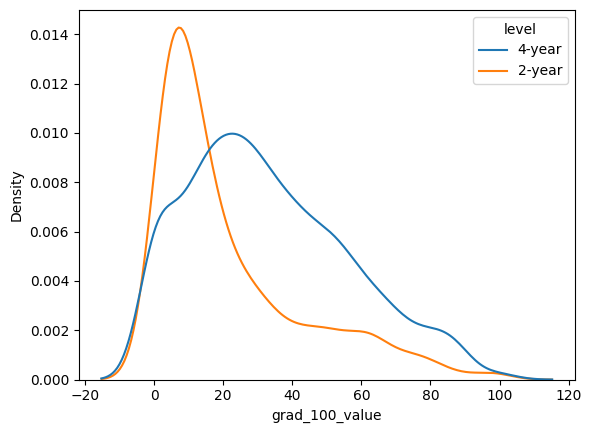

In [57]:
sns.kdeplot(data=df,x='grad_100_value',hue='level')

In [61]:
df.loc[:,['level','grad_100_value']].groupby('level').describe()

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

<Axes: xlabel='grad_100_value', ylabel='Density'>

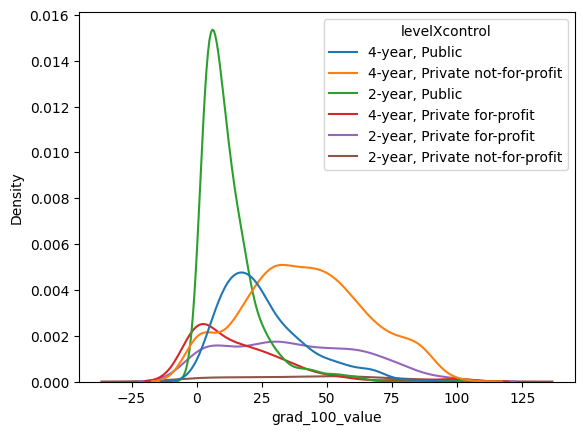

In [66]:
df['levelXcontrol']=df['level']+', '+df['control']
sns.kdeplot(data=df,x='grad_100_value', hue='levelXcontrol')

In [72]:
df.loc[:, ['level', 'control', 'grad_100_value']].groupby(['level','control']).describe()
# 2-year Private not-for-profit univerisities have the highest graduation rate, at mean of 41.91%


grad_100_value                             \
                                       count       mean        std  min   
level  control                                                            
2-year Private for-profit              461.0  37.197614  25.497380  0.0   
       Private not-for-profit           68.0  41.913235  28.348302  0.0   
       Public                          926.0  12.400000  10.893600  0.0   
4-year Private for-profit              318.0  17.382704  20.788525  0.0   
       Private not-for-profit         1121.0  41.645674  23.243453  0.0   
       Public                          573.0  25.561082  16.403902  0.0   

                                                            
                                  25%   50%     75%    max  
level  control                                              
2-year Private for-profit      15.800  33.9  57.800  100.0  
       Private not-for-profit  16.225  44.4  61.200  100.0  
       Public                   5.100   9.4  16.175   97.8  
4-year Private for-profit       0.000  12.5  26.325  100.0  
       Private not-for-profit  25.000  41.0  57.800  100.0  
       Public                  13.600  21.8  33.800   86.3

<Axes: xlabel='aid_value', ylabel='Density'>

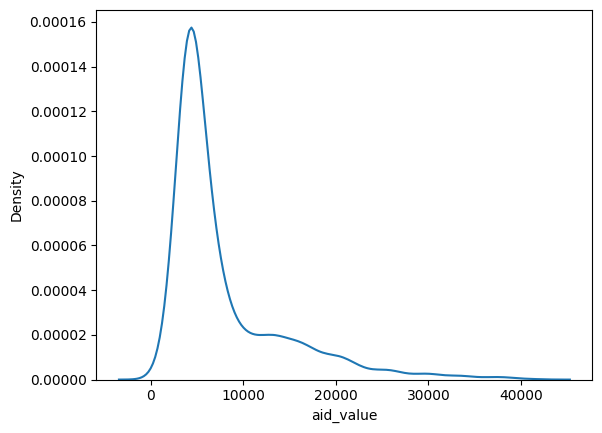

In [74]:
sns.kdeplot(df['aid_value'])
# The graph is pushed near to the back due to the number of students receiving zero aid

<Axes: xlabel='aid_value', ylabel='Density'>

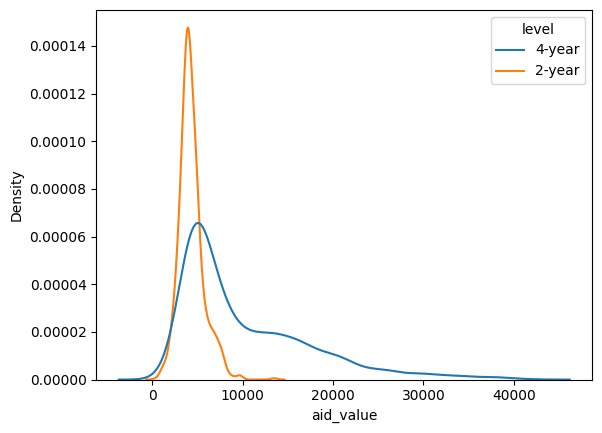

In [80]:
sns.kdeplot(data=df,x='aid_value',hue='level')

<Axes: xlabel='aid_value', ylabel='Density'>

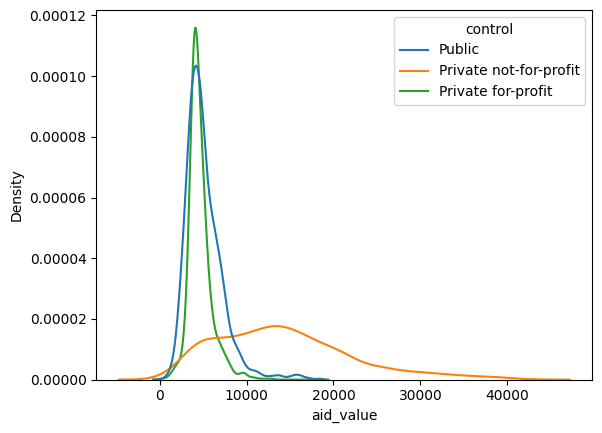

In [81]:
sns.kdeplot(data=df, x='aid_value',hue='control')

In [85]:
print(df.loc[:,['control','aid_value']].groupby('control').describe(), "\n")
print(df.loc[:,['level','aid_value']].groupby('level').describe())

                       aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0   

       aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

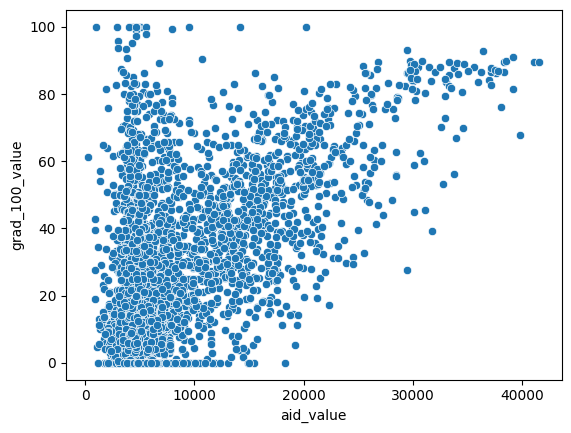

In [87]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value')
# It seems like graduation rate goes up with aid_value

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

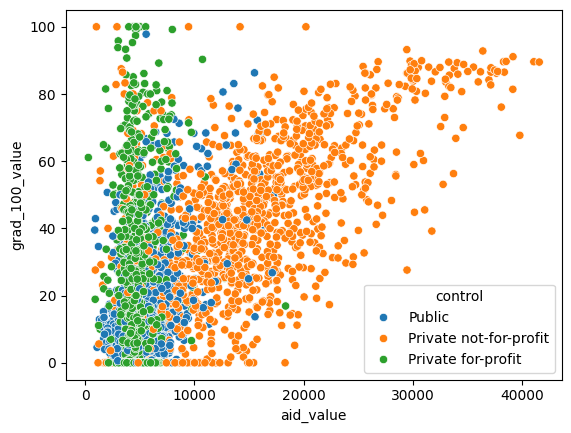

In [88]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value', hue='control')
# Aid value seems to have no impact on the graduation rate of private for-profit universities,
# a relatively weak impact in public universities, and a strong impact in private not-for-profit
# universities

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [ ]:
# Im using the COVID-19 nursing home data set. I find this particularly interesting because I used to work in a nursing home
# while COVID was still a very prominent issue. I'm also interested in health care applications for Data Science and Engineering
# in general.

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The Data Dictionary for this particular data set contains no information on missing values codes. The same is ture for categorical variables. Some categorical variables contain information on possible values, but not all. This data dictionary describes the variables well, but is not very in depth. It's OKAY.

In [94]:
covid_df = pd.read_csv('/content/drive/MyDrive/COVID-19 Nursing Home Data 02.04.2024.csv')

<ipython-input-94-3761a0b804d0>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  covid_df = pd.read_csv('/content/drive/MyDrive/COVID-19 Nursing Home Data 02.04.2024.csv')


In [99]:
covid_df.head()

,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,County,Submitted Data,...,Number of All Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week,Number of All Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week who Received a Completed COVID-19 Vaccination at Any Time,Recent Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time,Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time,Number of Residents Staying in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Residents Up to Date with COVID-19 Vaccines,Percentage of Current Residents Up to Date with COVID-19 Vaccines,Number of Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines
0,05/24/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05/31/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/07/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/14/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/21/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
covid_df.shape

(387426, 39)

In [131]:
# Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines
# and Residents Hospitalizations with Confirmed COVID-19
# I think these are jointly interesting because I would guess that there is a negative relationship
# between COVID-19 hospitalizations and healthcare personnel vaccinations.
percent_vacc = covid_df['Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines']
print(percent_vacc.size)
print(percent_vacc.isnull().sum())
# Because I can't infer much from the data dictionary, I am going to drop null values.
percent_vacc = percent_vacc.dropna()
resident_hosp = covid_df['Residents Hospitalizations with Confirmed COVID-19']
print(resident_hosp.value_counts())
print(resident_hosp.isnull().sum())
# Again, just going to drop missing values here
resident_hosp = resident_hosp.dropna()

387426
114998
0.0     380892
1.0       1660
2.0        345
3.0         63
4.0         24
5.0          8
9.0          2
6.0          2
8.0          1
11.0         1
7.0          1
Name: Residents Hospitalizations with Confirmed COVID-19, dtype: int64
4427


<Axes: ylabel='Residents Hospitalizations with Confirmed COVID-19'>

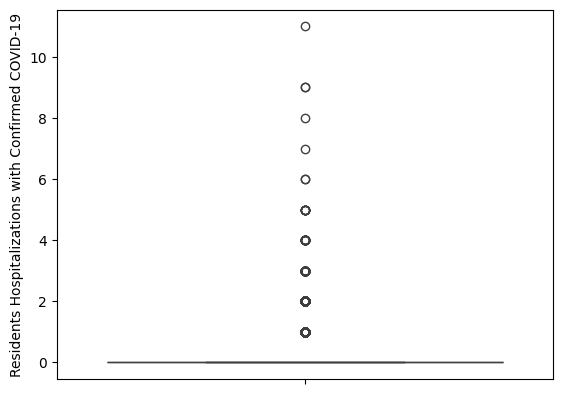

In [133]:
sns.boxplot(resident_hosp)
# These values are all outliers because the mean is heavily weighted towards 0

<Axes: ylabel='Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines'>

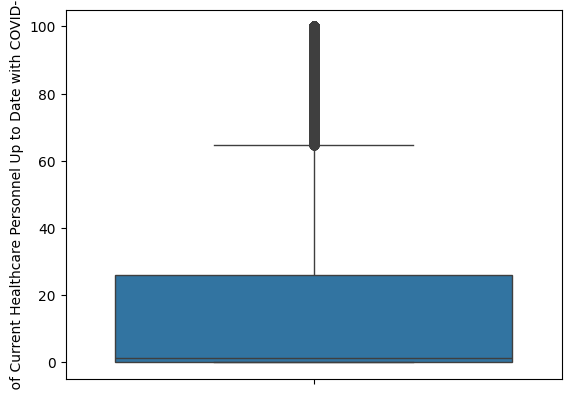

In [135]:
sns.boxplot(percent_vacc)
# It seems that most nursing home staff are between 0-20% Vaccinated, with
# many outliers near 60-100% (I would guess in better funnded nursing homes)

<Axes: xlabel='Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines', ylabel='Count'>

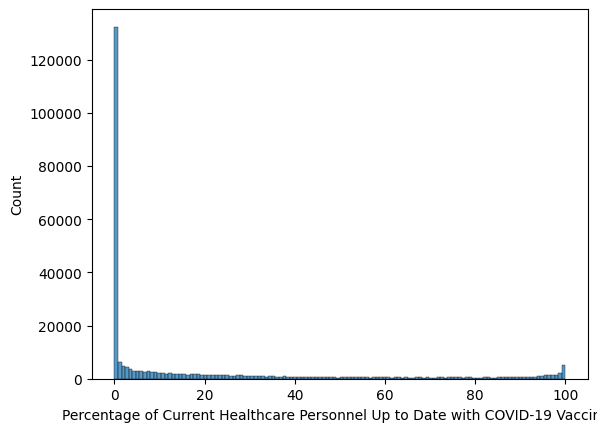

In [142]:
sns.histplot(percent_vacc)
# Might need to use arcsinh scaling

<Axes: xlabel='Residents Hospitalizations with Confirmed COVID-19', ylabel='Count'>

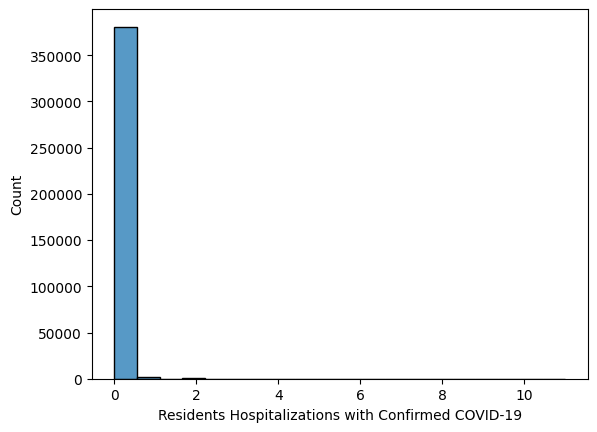

In [143]:
sns.histplot(resident_hosp)
# Also will need arcsinh for this

<Axes: xlabel='Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines', ylabel='Count'>

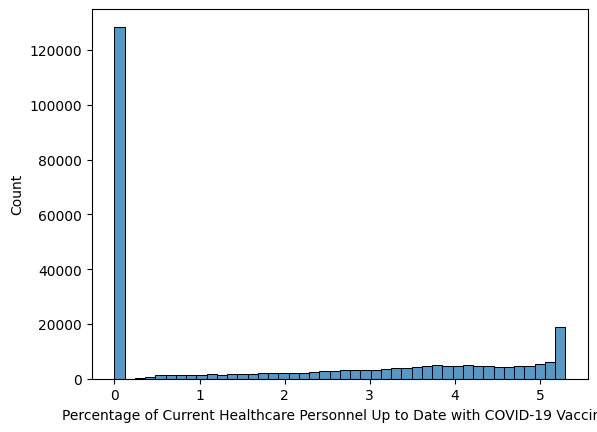

In [146]:
import numpy as np
percent_vacc_as = np.arcsinh(percent_vacc)
resident_hosp_as = np.arcsinh(resident_hosp)
sns.histplot(percent_vacc_as)

<Axes: xlabel='Residents Hospitalizations with Confirmed COVID-19', ylabel='Count'>

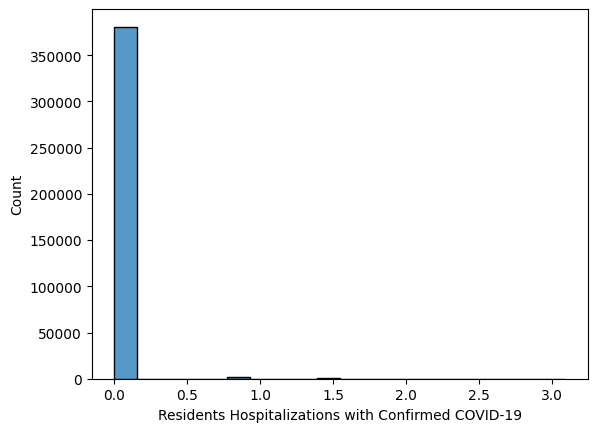

In [149]:
sns.histplot(resident_hosp_as)

<Axes: xlabel='Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines', ylabel='Residents Hospitalizations with Confirmed COVID-19'>

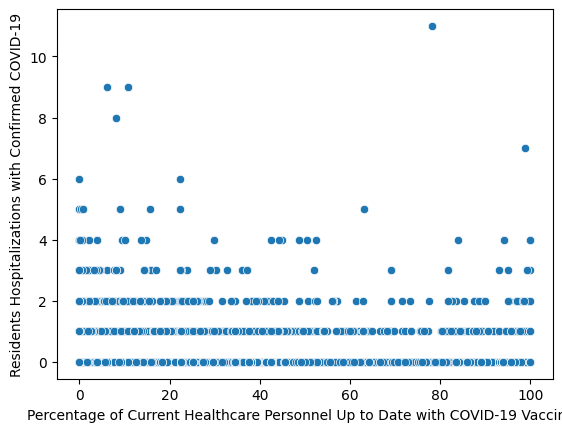

In [156]:
sns.scatterplot(x=percent_vacc, y=resident_hosp)
# It appears as though theres no relationship between the two varaibles

In [168]:
covid_df['Percent Vacc']= percent_vacc
covid_df['Resident Hosp']= resident_hosp
covid_df.loc[:,['Percent Vacc', 'Resident Hosp']].cov()

# There appears to be a negative correlation between the two variables, but
# the strength of the relationship is weak.

,Percent Vacc,Resident Hosp
Percent Vacc,889.553980,-0.030997
Resident Hosp,-0.030997,0.012114
